<a href="https://colab.research.google.com/github/HagarIbrahiem/Kaggle/blob/main/Paris_2024_Olympic_%7C_Follow_Olympic_Torch_Relay_%F0%9F%94%A5_%26_Olympic_Venues_%F0%9F%8F%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About The Data! 🔖

The Paris 2024 Olympic Summer Games dataset provides comprehensive information about the 2024 Summer Olympics, including participating countries, athletes, sports disciplines, and medal standings.
Within this notebook, the objective is to:
- Use `torch_route.csv` to **follow the Olympic torch route across French cities**. 🔥
- Additionally, **explore all Olympic venues by the type of sports** they are ready to host using the `venues.csv`. 🚴 🏋️ 🏹

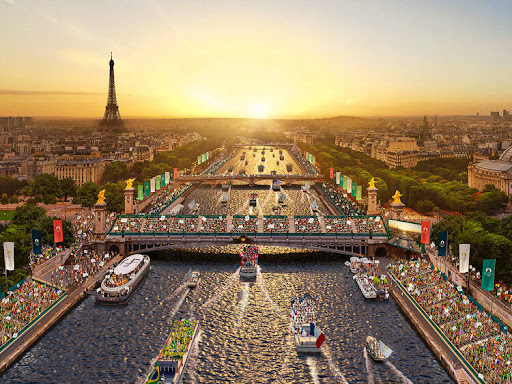

# Libs & Utilities 🔌🔧

In [15]:
import pandas as pd
import numpy as np
import random
import pytz
import datetime
import ast

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import folium
from geopy.geocoders import Nominatim
import ipywidgets as widgets
from folium.plugins import AntPath


from IPython.display import HTML,display, IFrame, clear_output

import warnings
warnings.filterwarnings("ignore")

In [20]:
# pip install ipywidgets

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 70)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_colwidth', 2000)


# Load Data ⏳

In [4]:
#Downloading dataset
! kaggle datasets download piterfm/paris-2024-olympic-summer-games

from zipfile import ZipFile

# specifying the name of the zip file
file = "/content/paris-2024-olympic-summer-games.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as _zip:
    # extract all files to another directory
    _zip.extractall('Datasets')

Dataset URL: https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.06M [00:00<?, ?B/s]
100% 2.06M/2.06M [00:00<00:00, 99.6MB/s]


In [5]:
df_torch_route =pd.read_csv( '/content/Datasets/torch_route.csv')
df_venues =pd.read_csv( '/content/Datasets/venues.csv')


In [6]:
df_torch_route.head(1)

,title,city,date_start,date_end,tag,url,stage_number
0,Lighting Ceremony,Olympia,2024-04-15T22:01:00Z,2024-04-16T10:01:00Z,lighting-ceremony,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/lighting-ceremony,NaN


In [7]:
df_venues.head(1)

,venue,sports,date_start,date_end,tag,url
0,Aquatics Centre,"['Artistic Swimming', 'Diving', 'Water Polo']",2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aquatics-centre


# Olympic Torch Relay | Follow the Paris 2024 Olympic Flame

This code creates an interactive map that visualizes the Olympic torch relay route, including markers, arrows, and custom prompots for each city.

In [8]:
geolocator = Nominatim(user_agent="torch_route")

# Geocode cities
def geocode_city(city):
    try:
        location = geolocator.geocode(city + ", France")
        return (location.latitude, location.longitude)
    except:
        return None



In [9]:
df_torch_route['coords'] = df_torch_route['city'].apply(geocode_city)
df_torch_route.head()

,title,city,date_start,date_end,tag,url,stage_number,coords
0,Lighting Ceremony,Olympia,2024-04-15T22:01:00Z,2024-04-16T10:01:00Z,lighting-ceremony,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/lighting-ceremony,NaN,"(48.8702443, 2.3283595)"
1,Relay in Greece,NaN,2024-04-16T10:02:00Z,2024-04-26T17:06:00Z,relay-in-greece,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/relay-in-greece,NaN,None
2,Handover Ceremony,Athens,2024-04-25T22:01:00Z,2024-04-26T17:07:00Z,handover-ceremony,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/handover-ceremony,NaN,None
3,Crossing the Mediterranean,Marseille,2024-04-26T17:08:00Z,2024-05-07T22:01:00Z,mediterranean-crossing,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/mediterranean-crossing,NaN,"(43.2961743, 5.3699525)"
4,Prologue,Marseille,2024-05-07T22:02:00Z,2024-05-08T20:02:00Z,prologue-marseille,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/prologue-marseille,NaN,"(43.2961743, 5.3699525)"


💡 It's been noticed that GeoCoding failed 4 times; let's investigate that.

In [10]:
print("Before dropping NaN rows:", df_torch_route.shape)

# Identify rows with NaN values in the 'coords' column
nan_rows = df_torch_route[df_torch_route['coords'].isna()]

print("Rows with NaN values in 'coords' column:")
nan_rows.head()



Before dropping NaN rows: (73, 8)
Rows with NaN values in 'coords' column:


,title,city,date_start,date_end,tag,url,stage_number,coords
1,Relay in Greece,NaN,2024-04-16T10:02:00Z,2024-04-26T17:06:00Z,relay-in-greece,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/relay-in-greece,NaN,None
2,Handover Ceremony,Athens,2024-04-25T22:01:00Z,2024-04-26T17:07:00Z,handover-ceremony,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/handover-ceremony,NaN,None
20,Vienne,Grand Poitiers Futuroscope,2024-05-24T22:01:00Z,2024-05-25T21:59:00Z,vienne-grand-poitiers-futuroscope,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/vienne-grand-poitiers-futuroscope,16.0,None
35,French Polynesia,Pīra'e-Pape'ete,2024-06-12T22:01:00Z,2024-06-13T21:59:00Z,polynesie-francaise-papeete,https://olympics.com/en/paris-2024/olympic-torch-relay/stages/polynesie-francaise-papeete,31.0,None


💡 It has been noticed that the geocoding failed:

- For `Relay in Greece` and `Handover Ceremony in Athena` the geocoding failed because these locations are not in Paris. The flame burned at the ancient Acropolis in Athens, a week before its handover to the Paris 2024 organizers. The ritual began at Ancient Olympia, the original site of the Olympic Games, with the lighting of the Olympic flame. This tradition continues today, marking the start of each Olympic Games' preparations. The lighting ceremony took place several months before the Olympics, near the temple of Hera in Olympia.

- For 'Vienne' and 'French Polynesia', we need to manually fill in the location details, as they were not recognized by the Geopy library.

In [11]:
# # Ensure coords column is of type string
# df_torch_route['coords'] = df_torch_route['coords'].astype(str)

# # Update coordinates for specific titles
# df_torch_route.loc[df_torch_route['title'] == 'Vienne', 'coords'] = '(45.528, 4.874)'
# df_torch_route.loc[df_torch_route['title'] == 'French Polynesia', 'coords'] = '(17.6797, -149.4068)'


In [12]:
# Drop rows where geocoding failed
df_torch_route = df_torch_route.dropna(subset=['coords'])

# Print the shape of the DataFrame after dropping NaN values
print("After dropping NaN rows:", df_torch_route.shape)


After dropping NaN rows: (69, 8)


In [16]:


# Convert date columns to datetime objects
df_torch_route['date_start'] = pd.to_datetime(df_torch_route['date_start'], errors='coerce')
df_torch_route['date_end'] = pd.to_datetime(df_torch_route['date_end'], errors='coerce')

# Initialize map centered on France
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Define a list of colors for the markers and arrows
colors = ['red', 'blue', 'green', 'orange', 'purple', 'darkred', 'lightblue', 'darkgreen', 'lightgreen', 'beige']

# Sort DataFrame by date_start to ensure stages are in order of events
df_torch_route = df_torch_route.sort_values('date_start').reset_index(drop=True)

# Add markers with popups
for i, row in df_torch_route.iterrows():
    # Format the popup message including the stage
    popup_message = (
        f"<div style='width: 300px; font-size: 14px;'>"
        f"<b>Stage:</b> {i + 1}<br>"  # Stage is 1-based index
        f"<b>Title:</b> {row['title']}<br>"
        f"<b>City:</b> {row['city']}<br>"
        f"<b>Start Date:</b> {row['date_start'].strftime('%Y-%m-%d %H:%M:%S')}<br>"
        f"<b>End Date:</b> {row['date_end'].strftime('%Y-%m-%d %H:%M:%S')}<br>"
        f"<b>Tag:</b> {row['tag']}<br>"
        # f"<b>URL:</b> {row['url']}"
        f"</div>"
    )

    # Choose a color for each city marker
    color = colors[i % len(colors)]

    # Determine if it's the first or last city
    if i == 0:
        icon = folium.Icon(color='black', icon='star', prefix='fa')  # Black star for the first city
    elif i == len(df_torch_route) - 1:
        icon = folium.Icon(color='black', icon='star', prefix='fa')  # Black star for the last city
    else:
        icon = folium.Icon(color=color)  # Regular color for other cities

    folium.Marker(
        location=row['coords'],
        icon=icon,
        popup=folium.Popup(popup_message, max_width=300)  # Set the max width of the popup
    ).add_to(m)

# Draw moving arrows connecting the cities with different colors
for i in range(len(df_torch_route) - 1):
    start = df_torch_route.iloc[i]['coords']
    end = df_torch_route.iloc[i + 1]['coords']
    color = colors[i % len(colors)]  # Different color for each arrow

    AntPath(
        locations=[start, end],
        dash_array=[20, 20],
        delay=1000,
        color=color,
        pulse_color=color,
        reverse=True
    ).add_to(m)

# Add a legend
legend_html = '''
    <div style="
        position: fixed;
        bottom: 50px; left: 50px; width: 300px; height: auto;
        background-color: white; border:2px solid black;
        z-index:9999; font-size:14px;
        ">
        <b>Legend</b><br>
        <i style="background:red"></i> City 1<br>
        <i style="background:blue"></i> City 2<br>
        <i style="background:green"></i> City 3<br>
        <!-- Add more legend entries here -->
    </div>
    '''
m.get_root().add_child(folium.Element(legend_html))

# Add custom CSS to make map full width
custom_css = """
<style>
#map {
    width: 100%;
    height: 100vh;
}
</style>
"""
m.get_root().html.add_child(folium.Element(custom_css))

# Add JavaScript for keyboard controls
custom_js = """
<script>
document.addEventListener('keydown', function(event) {
    var map = document.querySelector('#map')._leaflet_map;
    if (event.key === '+') {
        map.zoomIn();
    } else if (event.key === '-') {
        map.zoomOut();
    }
});
</script>
"""
m.get_root().html.add_child(folium.Element(custom_js))

# Save the map to an HTML file
m.save('torch_route_map.html')
display(m)



# Interactive Olympic Sport-Venue Selector

Paris gears up for the Olympic Games Paris 2024. The French capital hosts the world’s biggest sports festival. This edition is bigger than ever, with as many as 32 sports disciplines. All these sports, of course, need a stadium or venue. In the city itself, near Paris, and further across the country, there are some 35 stadiums or venues where a sport is held.


This code allows to filter by `sport` using a dropdown menu. Upon selection, it displays the specific URL page designed by the Olympics committee for detailed information about the sport and the French venue dedicated to hosting it.

In [17]:
df_venues =pd.read_csv( '/content/Datasets/venues.csv')
df_venues.head()

,venue,sports,date_start,date_end,tag,url
0,Aquatics Centre,"['Artistic Swimming', 'Diving', 'Water Polo']",2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aquatics-centre
1,Bercy Arena,"['Artistic Gymnastics', 'Basketball', 'Trampoline']",2024-07-27T09:00:00Z,2024-08-11T16:00:00Z,bercy-arena,https://olympics.com/en/paris-2024/venues/bercy-arena
2,Bordeaux Stadium,['Football'],2024-07-25T17:00:00Z,2024-08-02T21:59:00Z,bordeaux-stadium,https://olympics.com/en/paris-2024/venues/bordeaux-stadium
3,Champ de Mars Arena,"['Judo', 'Wrestling']",2024-07-27T08:00:00Z,2024-08-11T12:00:00Z,champ-de-mars-arena,https://olympics.com/en/paris-2024/venues/champ-de-mars-arena
4,Château de Versailles,"['Equestrian', 'Modern Pentathlon']",2024-07-27T07:30:00Z,2024-08-11T11:30:00Z,chateau-de-versailles,https://olympics.com/en/paris-2024/venues/chateau-de-versailles


In [18]:
# convert string representations of lists to actual lists
def safe_literal_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

df_venues['sports'] = df_venues['sports'].apply(safe_literal_eval)

# explode the 'sports' column
df_venues = df_venues.explode('sports')

df_venues.head()

,venue,sports,date_start,date_end,tag,url
0,Aquatics Centre,Artistic Swimming,2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aquatics-centre
0,Aquatics Centre,Diving,2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aquatics-centre
0,Aquatics Centre,Water Polo,2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aquatics-centre
1,Bercy Arena,Artistic Gymnastics,2024-07-27T09:00:00Z,2024-08-11T16:00:00Z,bercy-arena,https://olympics.com/en/paris-2024/venues/bercy-arena
1,Bercy Arena,Basketball,2024-07-27T09:00:00Z,2024-08-11T16:00:00Z,bercy-arena,https://olympics.com/en/paris-2024/venues/bercy-arena


In [19]:
dropdown = widgets.Dropdown(
    options=['Please choose a sport'] + list(df_venues['sports'].unique()),  # Add default value
    value='Please choose a sport',  # Set default value
    description='Sport:',
    disabled=False
)

def on_change(change):
    sport = change.new
    if sport == 'Please choose a sport':
        return

    clear_output(wait=True)
    display(HTML('<style>.widget-dropdown { width: 800px; margin: auto; }</style>'))  # Center styling
    display(dropdown)
    selected_row = df_venues[df_venues['sports'] == sport]
    if not selected_row.empty:
        venue_url = selected_row['url'].values[0]
        display(HTML(f'</br> <iframe src="{venue_url}" width="100%" height="700px"></iframe>'))

display(HTML('''
    <style>
        .widget-dropdown {
            width: 400px;
            margin: auto;
            display: block;
        }
    </style>
'''))

dropdown.observe(on_change, names='value')

display(dropdown)


Dropdown(description='Sport:', index=5, options=('Please choose a sport', 'Artistic Swimming', 'Diving', 'Wate…